<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout11_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #11 : Cross-Validation 

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Texas School Districts - Teacher Turnover

Consider the following data from school districts in Texas.  This investigation centers on understanding what influences the turnover rate of teachers.  There are a total of four predictor variables under consideration here.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response Variable: TeacherTurnoverRate; percent of teachers that leave each year</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Pct_EconomicDisadvanted - percent of students in high school that are economically disadvantaged</li>
          <li>FourYearGradRate - percent of students who graduate in 4 years</li>
          <li>Avg_TeacherSalary - average teacher salary in school</li>
          <li>Pct_RevenueLocal - percent of revenue that comes from local community 
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1RKq_ZUpUg75MIPK5bljWb7o-BsNeW_8V" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Load tidyverse

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [7]:
#@title Load Tidyverse
#load tidyverse package
library(tidyverse)



---




## Load the data

In [289]:
# Reading data in using read_csv 
TeacherTurnover <- read_csv("http://www.StatsClass.org/stat360/Datasets/TexasSchoolDistricts_TeacherTurnover.csv")

Rows: 1228 Columns: 6

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): DistrictName
dbl (5): Pct_EconomicDisadvantaged, FourYearGradRate, Avg_TeacherSalary, Pct...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Taking a quick look at the data...

In [291]:
head(TeacherTurnover)

DistrictName,Pct_EconomicDisadvantaged,FourYearGradRate,Avg_TeacherSalary,Pct_RevenueLocal,TeacherTurnoverRate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAYUGA ISD,38.2,92.1,45082,44.1,9.8
ELKHART ISD,51.5,98.6,40536,33.8,19.7
FRANKSTON ISD,59.0,100.0,42427,44.4,30.9
NECHES ISD,41.9,100.0,41691,38.8,12.1
PALESTINE ISD,76.1,89.7,42455,48.9,25.3
WESTWOOD ISD,61.9,94.2,40148,39.1,24.9


There are a small number of districts that have missing information.  The drop_na() function can be used to remove all NAs from the data.frame.

In [293]:
TeacherTurnover <- (TeacherTurnover
                    %>% drop_na()
                   )

## Model Considerations

A total of four models will be considered here.


1.   Model #1: TeacherTurnoverRate ~ Pct_EconomicDisadvantaged
2.   Model #2: TeacherTurnoverRate ~ FourYearGradRate
3.   Model #3: TeacherTurnoverRate ~ Avg_TeacherSalary
4.   Model #4: TeacherTurnoverRate ~ Pct_RevenueLocal



### Model #1: TeacherTurnoverRate ~ Pct_EconomicDisadvantaged

In [354]:
Model1 <- lm(TeacherTurnoverRate ~ Pct_EconomicDisadvantaged, data=TeacherTurnover)
summary(Model1)


Call:
lm(formula = TeacherTurnoverRate ~ Pct_EconomicDisadvantaged, 
    data = TeacherTurnover)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.309  -6.386  -1.715   4.525  73.752 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8.74365    1.05311   8.303  3.1e-16 ***
Pct_EconomicDisadvantaged  0.18843    0.01694  11.122  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.53 on 1051 degrees of freedom
Multiple R-squared:  0.1053,	Adjusted R-squared:  0.1045 
F-statistic: 123.7 on 1 and 1051 DF,  p-value: < 2.2e-16


### Model #2: TeacherTurnoverRate ~ FourYearGradRate

In [355]:
Model2 <- lm(TeacherTurnoverRate ~ FourYearGradRate, data=TeacherTurnover)
summary(Model2)


Call:
lm(formula = TeacherTurnoverRate ~ FourYearGradRate, data = TeacherTurnover)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.912  -6.678  -1.947   4.492  55.194 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      50.72372    2.38376   21.28   <2e-16 ***
FourYearGradRate -0.33623    0.02576  -13.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.33 on 1051 degrees of freedom
Multiple R-squared:  0.1395,	Adjusted R-squared:  0.1387 
F-statistic: 170.4 on 1 and 1051 DF,  p-value: < 2.2e-16


### Model #3: TeacherTurnoverRate ~ Avg_TeacherSalary


In [356]:
Model3 <- lm(TeacherTurnoverRate ~ Avg_TeacherSalary, data=TeacherTurnover)
summary(Model3)


Call:
lm(formula = TeacherTurnoverRate ~ Avg_TeacherSalary, data = TeacherTurnover)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.924  -5.932  -1.298   4.728  68.412 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.812e+01  3.163e+00   21.54   <2e-16 ***
Avg_TeacherSalary -1.089e-03  7.109e-05  -15.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.07 on 1051 degrees of freedom
Multiple R-squared:  0.1826,	Adjusted R-squared:  0.1818 
F-statistic: 234.8 on 1 and 1051 DF,  p-value: < 2.2e-16


### Model #4: TeacherTurnoverRate ~ Pct_RevenueLocal

In [357]:
Model4 <- lm(TeacherTurnoverRate ~ Pct_RevenueLocal, data=TeacherTurnover)
summary(Model4)


Call:
lm(formula = TeacherTurnoverRate ~ Pct_RevenueLocal, data = TeacherTurnover)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.138  -6.561  -1.657   4.306  74.921 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      26.09634    0.71634  36.430   <2e-16 ***
Pct_RevenueLocal -0.15178    0.01556  -9.756   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.66 on 1051 degrees of freedom
Multiple R-squared:  0.08305,	Adjusted R-squared:  0.08217 
F-statistic: 95.19 on 1 and 1051 DF,  p-value: < 2.2e-16


## Apply Jackknife to Measure Prediction Accuracy

The following custom function can be used to obtain a jackknife estimate for the Root Mean Square Error.

In [358]:
#A custom function for obtaining RMSE via Jackknife
#INPUTS
#      This function takes two input arguments
#      1) A simple linear regression object, and 
#      2) data.frame used for fitting SLR model
#OUTPUTS
#     This function returns as output
#      1) vector of squared residuals
#      2) the jackknife estimate of RMSE

rmse.jackknife=function(slr_object,data_for_fit){
    
    #Getting the number of rows in data
    n = dim(data_for_fit)[1]

    #Keeping a copy of orginial y (used in computed residual)
    originaly = slr_object$model[,1]
    
    #Creating the output vector to save squared residuals
    output = rep(0,n)

    #Looping through data 
    for(i in 1:n){
        fit_minus_i = lm( formula(slr_object), data=data_for_fit[-i,] )
        predictedy_i = predict( fit_minus_i , newdata=data_for_fit[i,] )
        output[i] = ( originaly[i] - predictedy_i )^2
    }
    
    #Return the output vector and jackknife rmse
    #list(SquaredResids=output,Jackknife_RMSE=sqrt(mean(output, na.rm=TRUE)))
    return(Jackknife_RMSE=sqrt(mean(output, na.rm=TRUE)))
}

Using the rmse.jackknife() function for the data considered here.

In [359]:
cat("\nJackknife Estimate of RMSE for Model #1:")
round( rmse.jackknife(Model1, TeacherTurnover), 2)

cat("\nJackknife Estimate of RMSE for Model #2:")
round( rmse.jackknife(Model2, TeacherTurnover), 2)

cat("\nJackknife Estimate of RMSE for Model #3:")
round( rmse.jackknife(Model3, TeacherTurnover), 2)

cat("\nJackknife Estimate of RMSE for Model #4:")
round( rmse.jackknife(Model4, TeacherTurnover), 2)



Jackknife Estimate of RMSE for Model #1:

[1] 10.55


Jackknife Estimate of RMSE for Model #2:

[1] 10.37


Jackknife Estimate of RMSE for Model #3:

[1] 10.08


Jackknife Estimate of RMSE for Model #4:

[1] 10.68



---



---



## "Leave-one-out" via caret package

In [ ]:
install.packages("caret")
library(caret)

The following code can be used to run a "leave-one-out" cross-validation algorithm with the caret package in R.

In [366]:
#Using the caret package to conduct the leave-one-out cross validation
#The cross-validation settings are set with the trainControl() function.
#Here, the leave-one-out cross validation (LOOCV) is being specifed
cv_settings <- trainControl(method = "LOOCV")

#Next, use the train() function to conduct the cross-validation procedure for this data/model
model_caret <- train(TeacherTurnoverRate ~ Avg_TeacherSalary ,   # model to fit
                     data = TeacherTurnover,                     # data used for the fit   
                     trControl = cv_settings,                    # settings for cross-validation
                     method = "lm",                              # specifying a regression model
                     na.action = na.pass                        # helps with NA
                    )

#Print the output from the LOOCV algorithm
model_caret

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1052, 1052, 1052, 1052, 1052, 1052, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  10.08144  0.1787502  7.178362

Tuning parameter 'intercept' was held constant at a value of TRUE

In addition to the $RMSE$, the $R^2$ and $MAE$ are computed as well on the test set.

$$
MAE = \frac{\sum |y_{i} - \hat{y}_{i}|}{n}
$$
where $\hat{y}_{i}$ is the predicted value for the $i^{th}$ observation



---



---



##  Train / Test Cross-Validation Algorithm

<u>Step #1</u>:  Divide the data into the train and test set

In [320]:
#How many rows in data.frame
dim(TeacherTurnover)

[1] 1053    6

In [341]:
#Create a rowid vector
rowid <- seq(from=1, to=1053, by=1)

#Obtain the training set
train <- sample(rowid, size = (0.75*length(rowid)), replace=FALSE)
sort(train)

cat("\nHow many observations in training set:")
length(train)

[1]    2    5    6    7    9   11   12   14   16   17   19   23   24   25   26
 [16]   27   31   33   34   35   37   38   39   41   42   44   45   46   47   48
 [31]   51   52   53   54   56   61   63   66   67   69   71   72   73   76   78
 [46]   80   81   82   83   84   86   88   89   90   91   92   94   95   97   99
 [61]  100  101  103  104  105  106  107  109  110  111  113  115  116  117  118
 [76]  120  122  123  124  125  127  129  130  131  132  133  134  136  138  139
 [91]  140  142  145  146  147  149  152  153  155  158  160  161  163  164  167
[106]  168  169  170  171  172  174  175  179  181  182  183  184  185  187  189
[121]  190  191  193  195  196  197  198  199  200  201  202  203  204  205  206
[136]  208  209  210  211  212  213  214  215  216  217  218  219  220  223  224
[151]  225  226  227  228  229  230  231  232  233  234  235  237  238  239  240
[166]  241  243  244  245  246  248  249  250  251  252  253  254  255  257  258
[181]  260  261  262  263  264  265  266  267  269  270  271  272  273  275  276
[196]  277  278  281  282  284  285  286  287  288  289  290  291  292  294  295
[211]  296  298  299  300  301  302  303  304  305  307  308  309  310  311  312
[226]  313  314  315  316  319  320  322  323  325  326  328  329  330  331  334
[241]  335  337  338  339  340  341  343  345  347  348  349  350  351  352  353
[256]  354  357  359  360  362  363  364  365  366  367  368  369  370  372  373
[271]  374  375  376  377  378  379  380  381  382  386  387  390  391  392  393
[286]  394  395  396  397  398  399  400  401  402  403  404  405  406  407  408
[301]  409  410  411  412  414  415  416  417  419  420  421  422  423  425  428
[316]  429  430  431  432  434  435  436  437  438  439  440  441  442  443  444
[331]  445  447  454  456  457  458  459  461  462  465  466  471  472  473  474
[346]  475  477  479  481  483  484  485  487  488  489  490  491  492  493  495
[361]  496  497  498  499  500  501  503  504  505  506  508  509  510  511  514
[376]  516  517  519  521  523  525  527  528  529  531  532  533  534  536  538
[391]  540  541  542  543  545  546  548  550  551  552  553  554  555  556  557
[406]  559  561  562  563  564  565  566  567  568  569  570  571  572  574  575
[421]  576  577  578  579  580  581  582  583  584  585  586  587  589  590  592
[436]  593  594  595  596  599  600  602  603  605  607  608  609  610  612  613
[451]  614  615  616  618  619  620  621  622  623  625  626  627  628  629  630
[466]  631  632  634  635  636  637  638  639  640  641  643  646  647  648  650
[481]  652  654  655  656  657  658  659  660  662  663  666  667  669  672  673
[496]  674  675  676  677  679  681  683  684  685  687  688  689  690  691  692
[511]  694  695  697  698  699  700  702  703  704  706  709  710  713  714  715
[526]  716  718  720  722  724  725  726  727  729  730  731  732  733  734  735
[541]  736  737  738  739  740  741  742  743  744  746  748  750  751  752  753
[556]  755  756  757  758  759  760  761  763  764  765  767  769  770  772  773
[571]  774  775  776  777  778  780  781  782  785  786  788  789  790  792  794
[586]  796  797  798  799  801  802  803  804  805  806  809  810  811  812  813
[601]  814  815  816  817  818  819  823  825  826  827  830  831  832  834  835
[616]  836  839  840  841  842  844  845  846  848  849  850  851  852  853  856
[631]  857  858  859  860  862  864  865  866  867  868  869  871  872  873  874
[646]  875  876  877  880  881  882  884  885  886  887  888  889  890  891  892
[661]  893  896  898  899  901  902  903  904  905  906  907  908  909  910  911
[676]  912  913  914  915  917  918  923  924  925  926  927  928  929  931  932
[691]  934  935  936  937  938  939  940  942  943  944  945  946  947  948  949
[706]  950  951  952  953  954  955  956  957  958  960  962  963  964  966  967
[721]  968  969  970  971  972  973  975  976  977  978  979  981  982  983  984
[736]  985  986  987  989  990  9


How many observations in training set:

[1] 789

In [342]:
#Obtain the test set
test <- rowid[-train]
sort(test)

cat("\nHow many observations in test set:")
length(test)

[1]    1    3    4    8   10   13   15   18   20   21   22   28   29   30   32
 [16]   36   40   43   49   50   55   57   58   59   60   62   64   65   68   70
 [31]   74   75   77   79   85   87   93   96   98  102  108  112  114  119  121
 [46]  126  128  135  137  141  143  144  148  150  151  154  156  157  159  162
 [61]  165  166  173  176  177  178  180  186  188  192  194  207  221  222  236
 [76]  242  247  256  259  268  274  279  280  283  293  297  306  317  318  321
 [91]  324  327  332  333  336  342  344  346  355  356  358  361  371  383  384
[106]  385  388  389  413  418  424  426  427  433  446  448  449  450  451  452
[121]  453  455  460  463  464  467  468  469  470  476  478  480  482  486  494
[136]  502  507  512  513  515  518  520  522  524  526  530  535  537  539  544
[151]  547  549  558  560  573  588  591  597  598  601  604  606  611  617  624
[166]  633  642  644  645  649  651  653  661  664  665  668  670  671  678  680
[181]  682  686  693  696  701  705  707  708  711  712  717  719  721  723  728
[196]  745  747  749  754  762  766  768  771  779  783  784  787  791  793  795
[211]  800  807  808  820  821  822  824  828  829  833  837  838  843  847  854
[226]  855  861  863  870  878  879  883  894  895  897  900  916  919  920  921
[241]  922  930  933  941  959  961  965  974  980  988  992 1000 1003 1004 1012
[256] 1014 1025 1026 1041 1042 1043 1045 1049 1053


How many observations in test set:

[1] 264

Step #2: Fit the model usign the Training set

In [345]:
Model3_Training <- lm(TeacherTurnoverRate ~ Avg_TeacherSalary, data=TeacherTurnover[train,])

Step #3: Make predictions for observations in Test set and obtain RMSE from these predictions

In [346]:
TeacherTurnover_TestPredictions <- (TeacherTurnover[test,]
    %>% mutate(Predicted = predict(Model3_Training, newdata=TeacherTurnover[test,]))
    %>% mutate(Residual = (TeacherTurnoverRate - Predicted))
    %>% mutate(Residual_Squared = Residual^2)
)

cat("\n RMSE & R2 via Train / Test Cross Validation:\n\n")
(TeacherTurnover_TestPredictions
   %>% drop_na()
   %>% summarize(RMSE = sqrt(mean(Residual_Squared)), 
                 R2 = cor(TeacherTurnoverRate, Predicted)^2 
                )
)


 RMSE & R2 via Train / Test Cross Validation:



RMSE,R2
<dbl>,<dbl>
11.05943,0.1944627




---



---



## Train / Test or Split Sample via caret package

The following code apply the Train / Test (or split-sample) cross-validation to our data/model.  The setup of the cross-validation settings are specifed here.

*   The <strong>boot</strong> (short for bootstrap) method is specifed for the split-sample approach
*   The proportion of observations used in the training set will be $75\%$
*   Only 1 instance of the split-sample process will be done here

Next, consider the following implementation for our data/model.



In [391]:
#Using the caret package to conduct a split-sample cross validation
#The cross-validation settings are set with the trainControl() function.
#Here, the boot (bootstrap) is being specifed with p=75%, only 1 split-sample will run
cv_settings <- trainControl(method = "boot", p=0.75, number=1)

model_caret <- train(TeacherTurnoverRate ~ Avg_TeacherSalary,   # model to fit
                     data = TeacherTurnover,                    # data used for the fit     
                     trControl = cv_settings,                   # settings for cross-validation
                     method = "lm",                             # specifying a regression model
                     na.action = na.pass                        # helps with NA
                    )

#Print the output
model_caret         

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Bootstrapped (1 reps) 
Summary of sample sizes: 1053 
Resampling results:

  RMSE      Rsquared   MAE     
  10.53836  0.1876332  7.518072

Tuning parameter 'intercept' was held constant at a value of TRUE

## K-Fold Cross-Validation via the caret package

The following snip-it of code can be used to conduct K-Fold cross-validation using the caret package for our data/model.

*    cv should be specified as the method for k-fold
*    the number of folds is specified via number in the trainControl() function


In [398]:
#Using the caret package to conduct a k-fold cross validation
#The cross-validation settings are set with the trainControl() function.
#Here, the cv method is being specifed for K-Fold and the number of folds is 8
cv_settings <- trainControl(method = "cv", number=8)


model_caret <- train(TeacherTurnoverRate ~ Avg_TeacherSalary,   # model to fit
                     data = TeacherTurnover,                    # data used for the fit     
                     trControl = cv_settings,                   # settings for cross-validation
                     method = "lm",                             # specifying a regression model
                     na.action = na.pass                        # helps with NA
                    )

#Print the cross-validation output
model_caret  

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (8 fold) 
Summary of sample sizes: 921, 921, 922, 921, 922, 921, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  10.02486  0.1814748  7.167916

Tuning parameter 'intercept' was held constant at a value of TRUE

The actual statistics from each fold can be captured from the model_caret object as is shown here.

In [405]:
KFold_Outcomes <- model_caret$resample
KFold_Outcomes

RMSE,Rsquared,MAE,Resample
<dbl>,<dbl>,<dbl>,<chr>
9.466924,0.1063208,7.167671,Fold1
9.227486,0.1796114,6.712111,Fold2
9.076365,0.1888829,6.591585,Fold3
9.485491,0.1298998,6.955973,Fold4
9.763006,0.2316204,7.396386,Fold5
10.132247,0.2016108,6.992389,Fold6
11.907093,0.2110928,8.025416,Fold7
11.140250,0.2027591,7.501800,Fold8


In order to plot these statistics easily, the data.frame will be put into a stacked format.

In [408]:
KFold_Outcomes_Stacked <- (
                    KFold_Outcomes 
                    %>% pivot_longer(c(RMSE, Rsquared, MAE), names_to = "Statistic", values_to = "Value")
)
head(KFold_Outcomes_Stacked)

Resample,Statistic,Value
<chr>,<chr>,<dbl>
Fold1,RMSE,9.4669242
Fold1,Rsquared,0.1063208
Fold1,MAE,7.1676710
Fold2,RMSE,9.2274859
Fold2,Rsquared,0.1796114
Fold2,MAE,6.7121106


In [429]:
(KFold_Outcomes_Stacked
  %>% group_by(Statistic)
  %>% summarize(Mean = mean(Value), Range = max(Value) - min(Value))
)

Statistic,Mean,Range
<chr>,<dbl>,<dbl>
MAE,7.1679164,1.4338313
RMSE,10.0248578,2.8307284
Rsquared,0.1814748,0.1252996


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



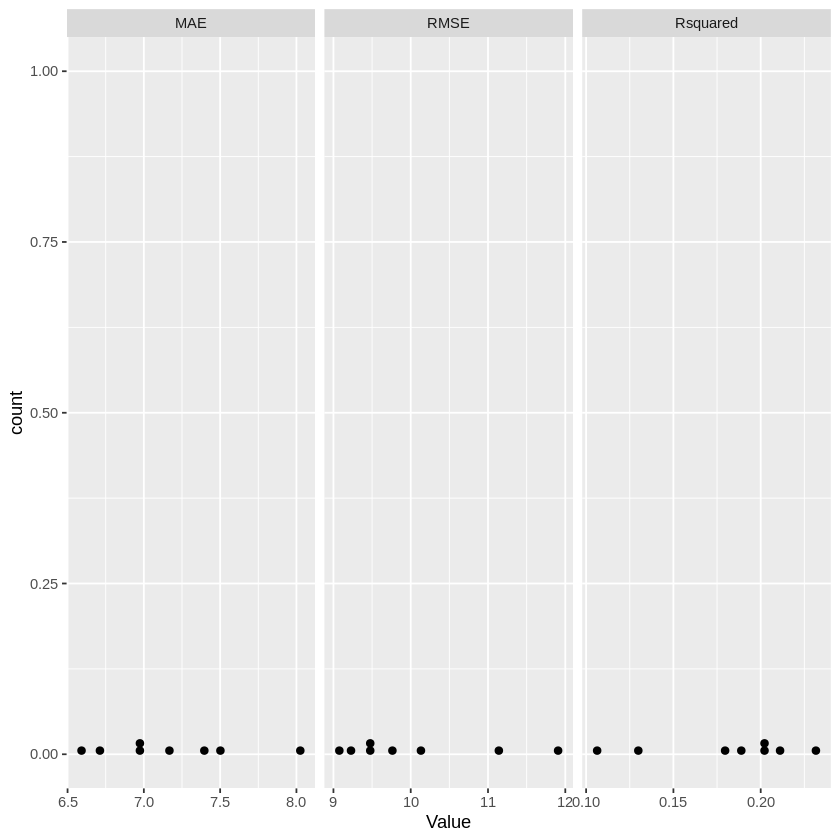

In [427]:
ggplot(KFold_Outcomes_Stacked, aes(x=Value)) +
 geom_dotplot() +
 facet_grid(. ~ Statistic, scales = "free_x") 



---



---



## Monte Carlo via caret package

In [431]:
#Using the caret package to conduct monte carlo cross validation
#Here, the boot (bootstrap) is being specifed with p=75%, 100 repeated splits will be done
cv_settings <- trainControl(method = "boot", p=0.75, number=500)

model_caret <- train(TeacherTurnoverRate ~ Avg_TeacherSalary,   # model to fit
                     data = TeacherTurnover,                    # data used for the fit     
                     trControl = cv_settings,                   # settings for cross-validation
                     method = "lm",                             # specifying a regression model
                     na.action = na.pass                        # helps with NA
                    )

#Print the output
model_caret  

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Bootstrapped (500 reps) 
Summary of sample sizes: 1053, 1053, 1053, 1053, 1053, 1053, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  10.08282  0.1839839  7.182532

Tuning parameter 'intercept' was held constant at a value of TRUE

Getting some summaries from the b=500 repeated split-sample cross-validation outcomes.

Statistic,Mean,Range,Count
<chr>,<dbl>,<dbl>,<int>
MAE,7.1825320,1.6645341,500
RMSE,10.0828192,3.4783380,500
Rsquared,0.1839839,0.1997111,500


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



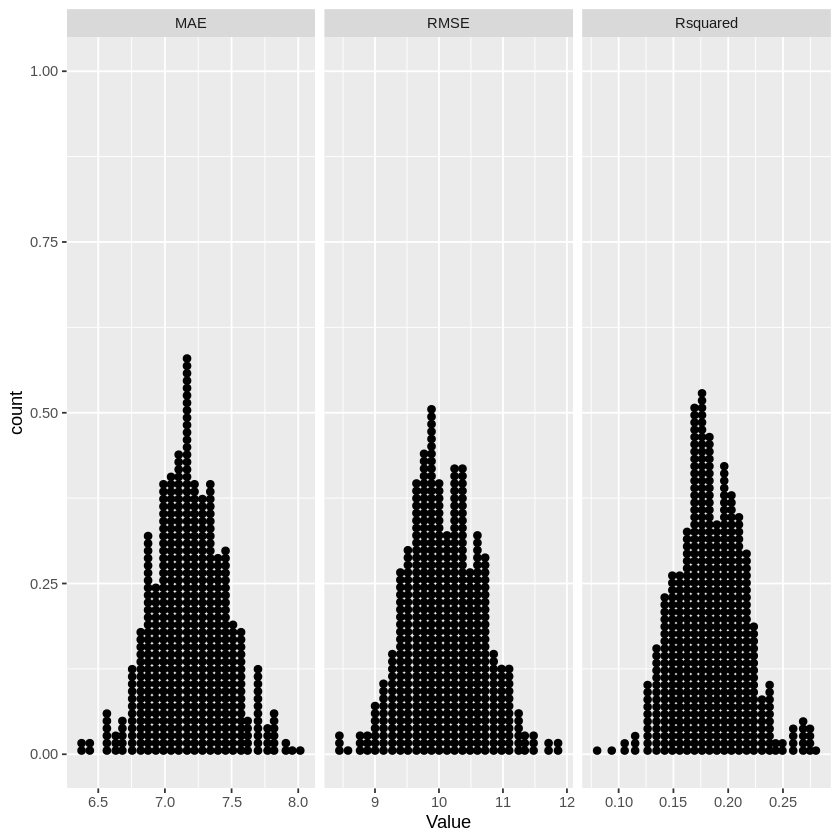

In [435]:
#Save the resample outcomes
KFold_Outcomes <- model_caret$resample

#Stack the outcome for easier summaries / plotting
KFold_Outcomes_Stacked <- (
                    KFold_Outcomes 
                    %>% pivot_longer(c(RMSE, Rsquared, MAE), names_to = "Statistic", values_to = "Value")
)

#Getting some basic summaries
(KFold_Outcomes_Stacked
  %>% group_by(Statistic)
  %>% summarize(Mean = mean(Value), Range = max(Value) - min(Value), Count = n())
)

#Creating some simple dotplots of the outcomes
ggplot(KFold_Outcomes_Stacked, aes(x=Value)) +
 geom_dotplot() +
 facet_grid(. ~ Statistic, scales = "free_x") 

End of Document